<a href="https://colab.research.google.com/github/FGalvao77/Pipeline-Etapas-de-projeto-de-Machine-Learning/blob/main/(Pipeline)_Etapas_de_projeto_de_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **(Pipeline) Etapas de projeto de Machine Learning**

---



## **O que é Machine Learning?**


_Machine Learning aborda a questão de como construir computadores que melhoram automaticamente por meio da **experiência**_ (JORDAN & MITCHELL, 2015).

### **Pipeline**

Nesse notebook será apresentado as etapas principais de um projeto de `Machine Learning`. 

Para exemplo prático utilizaremos o famoso conjunto de dados do _titanic_, onde nosso objetivo é predizer se o passageiro sobreviveu ou não ao trágico acidente dados alguns atributos.

**Etapas de um projeto de Ciência de Dados (Data Science) usando técnicas de Aprendizado de Máquina (Machine Learning)**

1. Bibliotecas;
2. Observação do conjunto de dados;
3. Análise exploratória dos dados;
4. Preparação dos dados;
5. Treinamento do modelo;
6. Avaliação do modelo;
7. Predição;
8. Otimização do modelo;
9. Exportação do modelo e,
10. Reutilização do modelo.

#### 1. Bibliotecas

In [1]:
# bibliotecas para análise e processamento dos dados
import pandas as pd
import numpy as np

In [2]:
# bibliotecas para visualização gráfica dos dados
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# sns.set()
%matplotlib inline

In [3]:
# importando a biblioteca para ignorar "erros"
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
# função para pré-processamento dos dados
from sklearn.preprocessing import StandardScaler

In [5]:
# função para gerar amostras dos dados
from sklearn.model_selection import train_test_split

In [6]:
# função para aprendizado de máquina - classificação
from sklearn.neighbors import KNeighborsClassifier

In [7]:
# função para avaliação do modelo
from sklearn.metrics import accuracy_score, precision_score

In [8]:
# função para otimização dos hiperparâmetros
from sklearn.model_selection import GridSearchCV

In [9]:
# biblioteca para aplicação do modelo 
import pickle

#### 2. Observação do conjunto de dados

In [10]:
# carregando o conjunto de dados de uma planilha excel (xls) em um dataframe que se encontra em uma url
url = 'https://biostat.app.vumc.org/wiki/pub/Main/DataSets/titanic3.xls'

> Segue o link do site do dataset:
- [Department of Biostatistics - Vanderbilt University School of Medicine](https://biostat.app.vumc.org/wiki/Main/WebHome)

In [11]:
# realizando a leitura do conjunto de dados 
df = pd.read_excel(url)

In [12]:
# visualizando as 5 primeiras linhas do conjunto de dados
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [13]:
# visualizando as 5 últimas linhas do conjunto de dados
df.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [14]:
# informações gerais do conjunto de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


#### 3. Análise exploratória dos dados

In [15]:
# dimensão do conjunto de dados
df.shape    # linhas e atributos (colunas)

(1309, 14)

In [16]:
# estatística descritiva dos dados
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [17]:
# podemos selecionar um atributo e visualizar seus dados estatísticos
df['age'].describe()

count    1046.000000
mean       29.881135
std        14.413500
min         0.166700
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: age, dtype: float64

In [18]:
# também podemos selecionar mais que um atributo e visualizar seus dados estatísticos
df[['age', 'fare']].describe().T    # com o método ".T" podemos realizar a transposição da exibição dos dados

,count,mean,std,min,25%,50%,75%,max
age,1046.0,29.881135,14.413500,0.1667,21.0000,28.0000,39.000,80.0000
fare,1308.0,33.295479,51.758668,0.0000,7.8958,14.4542,31.275,512.3292


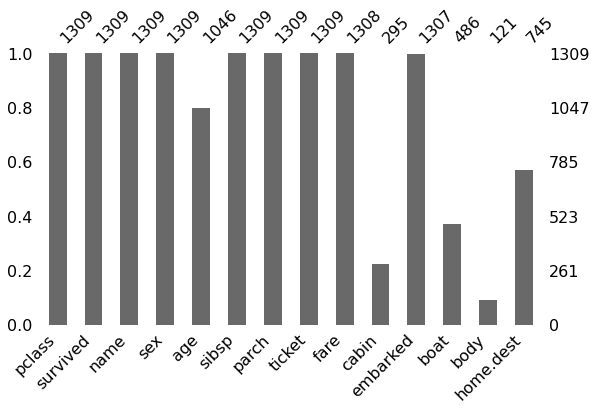

In [19]:
# plotando gráfico de barras com a função ".bar()" da biblioteca "missingno"
msno.bar(df, figsize=(9, 5));

> A biblioteca `MissingNo` permite a visualização de forma gráfica de dados nulos/faltantes no dataset, funciona com datasets tradicionais e também se mostra muito útil para dados como _séries temporais_.

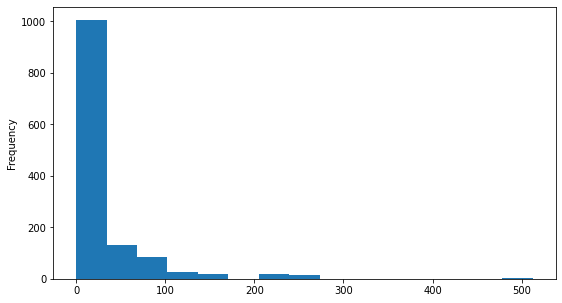

In [20]:
# plotando gráfico de histograma para o atributo "fare" (tarifa)
fig, ax = plt.subplots(figsize=[9, 5])
df['fare'].plot(kind='hist', ax=ax, bins=15)
plt.show();

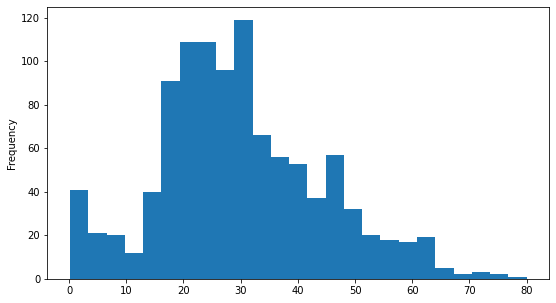

In [21]:
# plotando gráfico de histograma para o atributo "age" (idade)
fig, ax = plt.subplots(figsize=[9, 5])
df['age'].plot(kind='hist', ax=ax, bins=25)
plt.show();

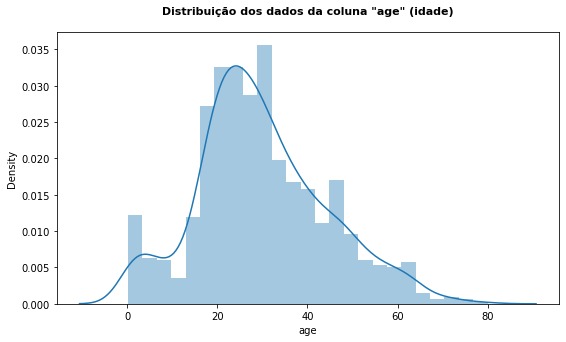

In [22]:
# visualizando a distribuição dos dados da variável "age" (idade)
plt.figure(figsize=(9, 5))
plt.title('Distribuição dos dados da coluna "age" (idade)\n', 
         fontsize = 11, fontweight = 'bold')
sns.distplot(df['age'], bins=25)
plt.show();

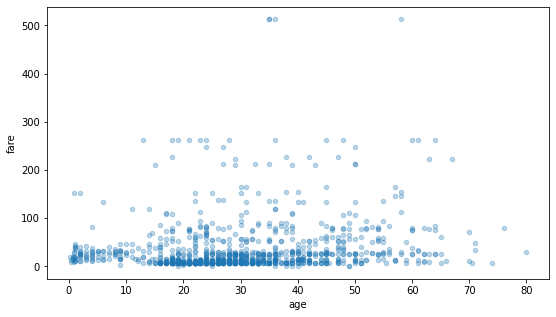

In [23]:
# plotando gráfico de dispersão para age (idade) VS fare (tarifa)
fig, ax = plt.subplots(figsize=[9, 5])
df.plot.scatter(x='age', y='fare', ax=ax, alpha=0.3)
plt.show();

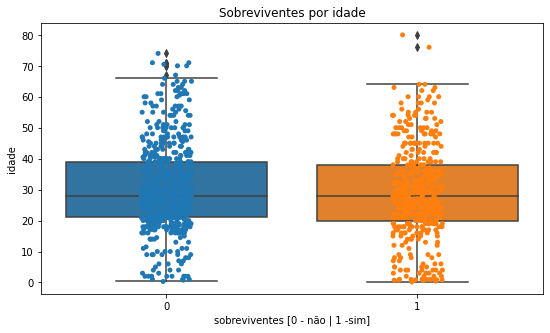

In [24]:
# plotando gráfico de caixa (boxplot) para o atributo "survived" (sobreviventes)
# com um diagrama de dispersão em relação ao atributo "age" (idade)
plt.figure(figsize=[9, 5])
sns.boxplot(x='survived', y='age', data=df)
sns.stripplot(x='survived', y='age', data=df,
              jitter=True, edgecolor='gray')
plt.xlabel('sobreviventes [0 - não | 1 -sim]')
plt.ylabel('idade')
plt.title('Sobreviventes por idade')
plt.show();

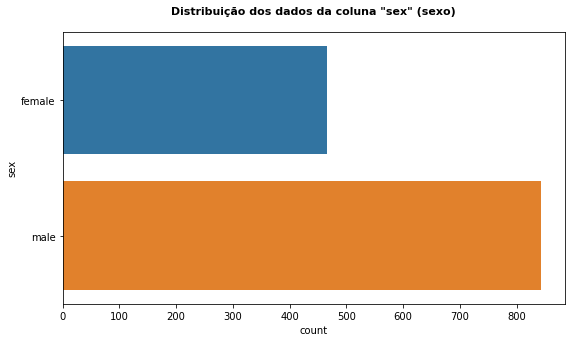

In [25]:
# usando a função ".countplot()" da biblioteca seaborn
# visualizando a distribuição dos dados da variável "sex"
plt.figure(figsize=(9, 5))
plt.title('Distribuição dos dados da coluna "sex" (sexo)\n', 
         fontsize = 11, fontweight = 'bold')
sns.countplot(data=df, y='sex');

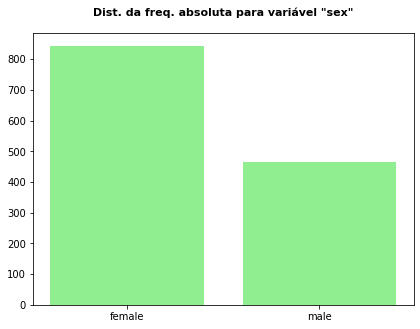

In [26]:
# plotando gráfico das distribuição absoluta da coluna "sex"
plt.figure(figsize=[15, 5])
plt.subplots_adjust(wspace=0.2)
plt.subplot(1,2,1)
plt.bar(df['sex'].unique(), df['sex'].value_counts(), color = 'lightgreen')
plt.title('Dist. da freq. absoluta para variável "sex"\n', 
          {'fontsize': 11,'fontweight': 'bold'})
plt.show();

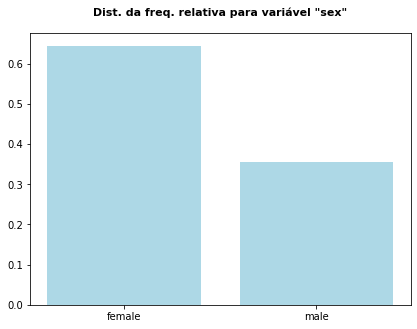

In [27]:
# plotando gráfico das distribuição relativa da coluna "sex"
plt.figure(figsize=[15, 5])
plt.subplot(1,2,2)
plt.bar(df['sex'].unique(), df['sex'].value_counts(normalize=True), color = 'lightblue')
plt.title('Dist. da freq. relativa para variável "sex"\n', 
          {'fontsize': 11,'fontweight': 'bold'})
plt.show();

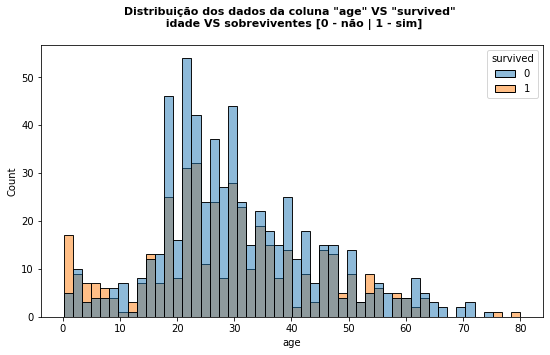

In [28]:
# visualizando a distribuição dos dados da coluna "age" (idade) VS "survived" (sobreviventes)
plt.figure(figsize=(9, 5))
plt.title('Distribuição dos dados da coluna "age" VS "survived" \n idade VS sobreviventes [0 - não | 1 - sim]\n', 
         fontsize = 11, fontweight = 'bold')
sns.histplot(data=df, x='age', hue='survived', bins=50);

In [29]:
# visualizando as instâncias únicas no atributo "survived" (sobreviventes)
df['survived'].unique()

array([1, 0])

In [30]:
# contabilizando as instâncias únicas no atributo "survived" (sobreviventes)
df['survived'].value_counts()

0    809
1    500
Name: survived, dtype: int64

In [31]:
# frequência absoluta e relativa das instâncias únicas no atributo "survived" (sobreviventes)
print(f'Frequência absoluta:\n{df.survived.value_counts()}')
print()
print(f'Frequência relativa:\n{df.survived.value_counts(normalize=True)}')
print()
print(f'Frequência relativa (%):\n{df.survived.value_counts(normalize=True) * 100}')

Frequência absoluta:
0    809
1    500
Name: survived, dtype: int64

Frequência relativa:
0    0.618029
1    0.381971
Name: survived, dtype: float64

Frequência relativa (%):
0    61.802903
1    38.197097
Name: survived, dtype: float64


In [32]:
# visualizando as instâncias únicas dos atributos
df.nunique()

pclass          3
survived        2
name         1307
sex             2
age            98
sibsp           7
parch           8
ticket        939
fare          281
cabin         186
embarked        3
boat           28
body          121
home.dest     369
dtype: int64

In [33]:
# correlação entre as variáveis numéricas
df.corr()

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265,NaN
age,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


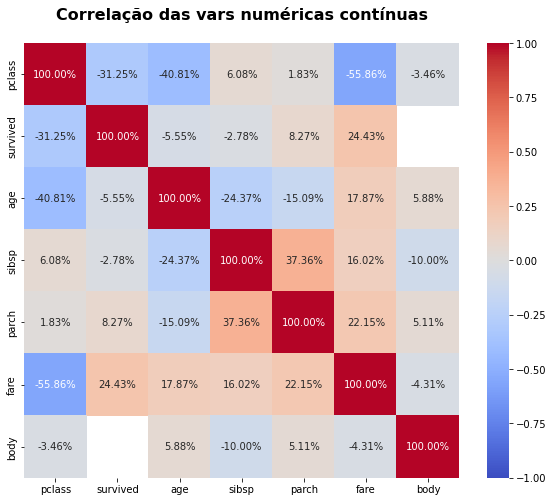

In [36]:
# gráfico de calor das correlações entre as variáveis numéricas
corr = df.corr()
plt.figure(figsize = (10, 8))
plt.title('Correlação das vars numéricas contínuas\n', 
                      {'fontsize': 16,'fontweight': 'bold'})
sns.heatmap(corr, fmt = '0.2%', annot = True, square = True,
            cmap='coolwarm', vmin=-1, vmax=1
            )
plt.show();
# plt.tight_layout();

Vamos instalar a biblioteca `Researchpy` para auxiliar nas análises estatísticas.

_A **Researchpy** produz Pandas DataFrames que contêm informações de teste estatístico relevantes que são normalmente necessárias para pesquisas acadêmicas. As informações são retornadas como DataFrames do Pandas para permitir a exportação rápida e fácil dos resultados para qualquer formato / método que funcione com o DataFrame tradicional do Pandas. O researchpy é essencialmente um wrapper que combina vários pacotes estabelecidos, como pandas, scipy.stats e statsmodels para obter todas as informações padrão exigidas em um método. Se as análises não estivessem disponíveis nesses pacotes, o código foi desenvolvido para preencher a lacuna._

> **Official Page:** https://pypi.org/project/researchpy/

In [37]:
# instalando a biblioteca
!pip install researchpy 

In [38]:
# importando a biblioteca
import researchpy as rp 

In [39]:
# criando uma função para auxiliar na visualização das avaliações estatísticas e das imagens gráficas
def categorical_analysis(data, index, col, figsize=(7, 4)):
    abs_tbl, test = rp.crosstab(data[index], data[col], 
                                test='chi-square', margins=False)
    row_tbl = rp.crosstab(data[index], data[col], prop='row')
    row_tbl = row_tbl.iloc[:-1, :-1]
    
    abs_tbl = abs_tbl.sort_values(('survived', 1))
    row_tbl = row_tbl.sort_values(('survived', 1))
    
    print(test)
    print('\n')
    
    _, ax = plt.subplots(1, 2, figsize=figsize, sharey=True)
    
    sns.heatmap(abs_tbl, annot=True, fmt='.5g', cbar=False, cmap='Blues', 
                annot_kws={'fontsize': 20}, ax=ax[0])
    sns.heatmap(row_tbl, annot=True, fmt='.5g', cbar=False, cmap='Greens', 
                annot_kws={'fontsize': 20}, ax=ax[1])
    plt.show();

                Chi-square test   results
0  Pearson Chi-square ( 1.0) =   365.8869
1                    p-value =     0.0000
2               Cramer's phi =     0.5287




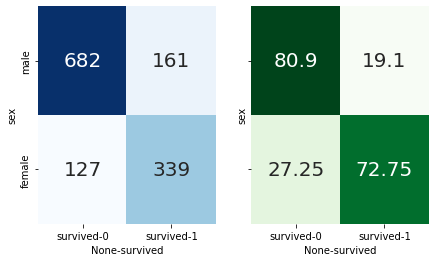

In [40]:
# visualizando a relação entre as colunas "sex" (sexo) e "survived" (sobreviventes)
categorical_analysis(df, 'sex', 'survived', figsize=(7, 4))

                Chi-square test  results
0  Pearson Chi-square ( 2.0) =   44.2417
1                    p-value =    0.0000
2                 Cramer's V =    0.1840




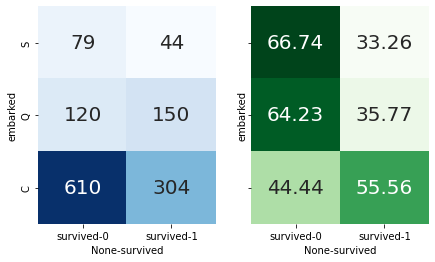

In [41]:
# visualizando a relação entre as colunas "embarked" (local de embarque) e "survived" (sobreviventes)
categorical_analysis(df, 'embarked', 'survived')

                Chi-square test   results
0  Pearson Chi-square ( 2.0) =   127.8592
1                    p-value =     0.0000
2                 Cramer's V =     0.3125




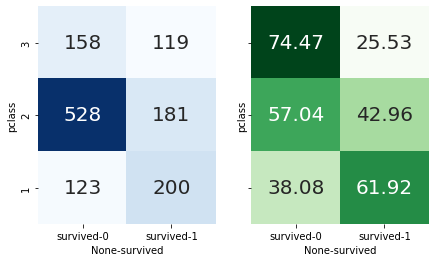

In [42]:
# visualizando a relação entre as colunas "pclass" (tipo da classe) e "survived" (sobreviventes)
categorical_analysis(df, 'pclass', 'survived')

> Diante dos resultados dos testes acima, podemos inferir que **há** fortes evidências estatísticas que as variáveis `sex`, `embarked` e `pclass` explica a nossa variável dependente, nesse caso `survived`.

- o sexo `female` (feminino) teve maior número de sobreviventes;
- local de embarque `Q` e `S` tiveram maior número de não sobreviventes e,
- os passageiros da classe `1` foram os que mais sobreviveram, enquanto o da classe `2` e, principalmente da classe `3` morreram.

#### 4. Preparação dos dados

In [43]:
# visualizando o nome dos atributos (colunas)
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [44]:
# criando uma cópia do conjunto de dados
df_copia = df.copy()

In [45]:
# removendo atributos pouco ou nada significativos para aprendizagem do modelo
df_copia = df_copia.drop(columns=[
                                  'name',       # nome
                                  'ticket',     # número da passagem
                                  'cabin',      # número da cabine
                                  'boat',       # barco
                                  'body',       # número de identicação do corpo
                                  'home.dest'  # origem/destino
                                ])

In [46]:
# criando variáves "dummy" para os atributos categóricos
df_copia = pd.get_dummies(df_copia, drop_first=True)

In [47]:
# visualizando o conjunto de dados após o tratamento
df_copia.head(10)   # 10 primeiras linhas

,pclass,survived,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,1,1,29.0000,0,0,211.3375,0,0,1
1,1,1,0.9167,1,2,151.5500,1,0,1
2,1,0,2.0000,1,2,151.5500,0,0,1
3,1,0,30.0000,1,2,151.5500,1,0,1
4,1,0,25.0000,1,2,151.5500,0,0,1
5,1,1,48.0000,0,0,26.5500,1,0,1
6,1,1,63.0000,1,0,77.9583,0,0,1
7,1,0,39.0000,0,0,0.0000,1,0,1
8,1,1,53.0000,2,0,51.4792,0,0,1
9,1,0,71.0000,0,0,49.5042,1,0,0


In [48]:
# separando os atributos de entrada e de saída
X = df_copia.drop(columns='survived')   # variáveis exolicativas
y = df_copia.survived                   # variável resposta

In [49]:
# particionando os dados aleatoriamente para treino e teste
# 70% para treinamento do modelo e 30% para validação do modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=42)

In [50]:
# visualizando as quantidades em cada subconjunto de dados
print('\tX')
print('Treinamento:', len(X_train))
print('Teste:      ', len(X_test))
print('\n\ty')
print('Treinamento:', len(y_train))
print('Teste:      ', len(y_test))

	X
Treinamento: 916
Teste:       393

	y
Treinamento: 916
Teste:       393


In [51]:
# visualizando informações gerais do subconjunto de dados de treino
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 916 entries, 1214 to 1126
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      916 non-null    int64  
 1   age         729 non-null    float64
 2   sibsp       916 non-null    int64  
 3   parch       916 non-null    int64  
 4   fare        915 non-null    float64
 5   sex_male    916 non-null    uint8  
 6   embarked_Q  916 non-null    uint8  
 7   embarked_S  916 non-null    uint8  
dtypes: float64(2), int64(3), uint8(3)
memory usage: 45.6 KB


In [52]:
# contabilizando a quantidade de valores "NaN" no atributo "age" (idade)
X_train['age'].isna().value_counts()

False    729
True     187
Name: age, dtype: int64

In [59]:
# iremos tratar os valores ausentes imputando uma medida numérica
# para esse exemplo iremos utilizar a média
media = X_train.mean()
X_train = X_train.fillna(media)
X_test = X_test.fillna(media)

In [60]:
# visualizando novamente as informações do sbconjunto de treino
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      916 non-null    float64
 1   age         916 non-null    float64
 2   sibsp       916 non-null    float64
 3   parch       916 non-null    float64
 4   fare        916 non-null    float64
 5   sex_male    916 non-null    float64
 6   embarked_Q  916 non-null    float64
 7   embarked_S  916 non-null    float64
dtypes: float64(8)
memory usage: 57.4 KB


In [61]:
# contabilizando novamente a quantidade de valores "NaN" no atributo "age" (idade)
X_train['age'].isna().value_counts()

False    916
Name: age, dtype: int64

In [62]:
# realizando a normalização dos atributos numéricos

# instaciando os atributos (colunas)
# cols = ['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_male',
#        'embarked_Q', 'embarked_S']
cols = X_train.columns
# print(cols)

std_scaler = StandardScaler()

X_train = std_scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=cols)

X_test = std_scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test, columns=cols)

In [63]:
# visualizando a estatística descritiva do subconjunto de dados de treino
X_train.describe()

,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
count,9.160000e+02,9.160000e+02,9.160000e+02,9.160000e+02,9.160000e+02,9.160000e+02,9.160000e+02,9.160000e+02
mean,-1.844716e-16,4.272419e-18,-8.108507e-17,-2.701623e-16,-1.109011e-17,4.702691e-17,-1.066590e-16,-5.696559e-17
std,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00
min,-1.551881e+00,-2.320933e+00,-4.986156e-01,-4.325534e-01,-6.381952e-01,-1.351725e+00,-3.300891e-01,-1.514914e+00
25%,-3.633166e-01,-5.559516e-01,-4.986156e-01,-4.325534e-01,-4.880628e-01,-1.351725e+00,-3.300891e-01,-1.514914e+00
50%,8.252478e-01,-7.091793e-02,-4.986156e-01,-4.325534e-01,-3.635050e-01,7.397954e-01,-3.300891e-01,6.601035e-01
75%,8.252478e-01,4.141157e-01,4.259429e-01,-4.325534e-01,-4.571697e-02,7.397954e-01,-3.300891e-01,6.601035e-01
max,8.252478e-01,4.132707e+00,6.897852e+00,9.640810e+00,9.067445e+00,7.397954e-01,3.029485e+00,6.601035e-01


#### 5. Treinamento do modelo

In [64]:
# instanciando o modelo
knn = KNeighborsClassifier()

In [65]:
# treinando o modelo com os subconjuntos de treino - X_train e y_train
knn.fit(X_train, y_train)

KNeighborsClassifier()

#### 6. Avaliação do modelo

In [66]:
# avaliando a acurácia do modelo com os subconjuntos de teste
score = knn.score(X_test, y_test)
print('Acurácia: %.2f' % score) 

Acurácia: 0.78


#### 7. Predição

In [67]:
# realizando a predição com os dados de teste
y_pred = knn.predict(X_test)

In [68]:
# visualizando as predições
y_pred

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,

In [69]:
# avaliando o modelo sobre os dados de teste
# utilizando a métrica de acurácia (0-1)
# para isso, utilizaremos a função "accuracy_score"
acc = accuracy_score(y_test, y_pred)
print('Acurácia: %.2f' % acc)

Acurácia: 0.78


In [70]:
# avaliando o modelo sobre os dados de teste
# utilizando a métrica de precisão (0-1)
# para isso, utilizaremos a função "precision_score"
prec = precision_score(y_test, y_pred)
print('Precisão: %.2f' % prec)

Precisão: 0.81


In [71]:
# importando a função para gerar um relatório das metricas e plotar a matriz de confusão
from sklearn.metrics import classification_report, plot_confusion_matrix

In [72]:
# iremos criar uma função para otimizar a aplicação do modelo
#  e a exibição do relatório e da matriz de confusão
def classification_results(classifier, x_test, y_test, cmap='Blues'):
    print('Resultados do modelo:', classifier.__class__.__name__)
    
    y_pred = classifier.predict(X_test)
    
    print(classification_report(y_test, y_pred))
    
    plot_confusion_matrix(classifier, X_test, y_test, cmap=cmap);

Resultados do modelo: KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       224
           1       0.81      0.64      0.72       169

    accuracy                           0.78       393
   macro avg       0.79      0.76      0.77       393
weighted avg       0.78      0.78      0.78       393



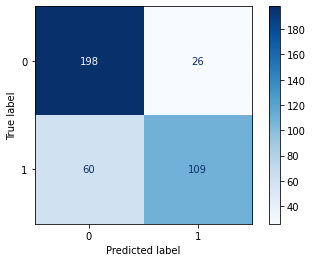

In [73]:
# aplicando a função criada e passando como argumentos o modelo 
# e as bases de testes - "X_test" e "y_test"
classification_results(knn, X_test, y_test)

#### 8. Otimização do modelo

In [74]:
# otimização dos hiperparâmetros do modelo K-NN
params ={
    'n_neighbors': list(range(1, 11)),                      # número de vizinhos
    'p': [1, 2],                                            # métrica de distância (manhattan = 1 | euclidiana = 2)
    'weights': ['uniform', 'distance'],                     # função de pesos para predição
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # algoritmos para computar as distâncias
}

In [75]:
# definindo a busca em grade para o processo de otimização
clf = GridSearchCV(estimator=knn, param_grid=params, 
                   cv=8, verbose=2)

# visualizando os hiperparâmetros
clf

GridSearchCV(cv=8, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             verbose=2)

In [76]:
# executando o método de busca para todos os conjuntos de hiperparâmetros
best_model = clf.fit(X_train, y_train)
best_model

Fitting 8 folds for each of 160 candidates, totalling 1280 fits
[CV] END algorithm=auto, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=1, p=

GridSearchCV(cv=8, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             verbose=2)

In [77]:
# visualizando o melhor hiperparâmetro
best_model.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=10)

#### 9. Exportação do modelo

In [78]:
# salvando o modelo escolhido em um arquivo
pickle.dump(best_model.best_estimator_, 
            open('modelo.sav', mode='wb'))  # "wb" - write binary

#### 10. Reutilização do modelo

In [79]:
# instanciando o modelo no objeto "arquivo"
arquivo = open('modelo.sav', mode='rb')    # "rb" - read binary

# realizando a leitura do modelo
modelo = pickle.load(arquivo)
print(modelo)   # visualizando o modelo

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=10)


In [80]:
# realizando a predição com o modelo
y_pred2 = modelo.predict(X_test)
y_pred2  # visualizando as predições

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,

In [81]:
    # visualizando a acurácia do modelo
    modelo.score(X_test, y_pred2)

1.0

In [82]:
# visualizando a versão do Python utilizado neste notebook
from platform import python_version
print(f'Versão Python: {python_version()}')

Versão Python: 3.7.12


In [85]:
# instalando a biblioteca "watermark"
!pip install watermark 
# esse pacote é usado para gravar as versões dos pacotes usados neste notebook

In [86]:
# versões das bibliotecas utilizadas neste notebook
%reload_ext watermark
%watermark -a 'Fernando Galvão | (Pipeline) Etapas de projeto de Machine Learning #20/11/2021' --iversions

Author: Fernando Galvão | (Pipeline) Etapas de projeto de Machine Learning #20/11/2021

pandas    : 1.1.5
matplotlib: 3.2.2
numpy     : 1.19.5
researchpy: 0.3.2
missingno : 0.5.0
seaborn   : 0.11.2
IPython   : 5.5.0

